# Importing Libraries & datasets

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_excel("..\dataset\ProductA.xlsx")
df2 = pd.read_excel("..\dataset\ProductA_google_clicks.xlsx")
df3 = pd.read_excel("..\dataset\ProductA_fb_impressions.xlsx")

# Data Preprocessing

### Merging datasets

In [6]:
df4 = pd.merge(df1, df2, on="Day Index", how="left")        # left joined
df = pd.merge(df4, df3, on="Day Index", how="left")

In [7]:
df.head()

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678


### Descriptive Statistics

In [8]:
df.shape

(212, 4)

| Rows | Columns |
|------|---------|
| 212  | 4       |


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Quantity     212 non-null    int64         
 2   Clicks       212 non-null    int64         
 3   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.8 KB


In [10]:
df.describe()

,Day Index,Quantity,Clicks,Impressions
count,212,212.000000,212.00000,212.000000
mean,2022-03-16 12:00:00,17.542453,358.20283,1531.702830
min,2021-12-01 00:00:00,5.000000,60.00000,620.000000
25%,2022-01-22 18:00:00,13.750000,154.00000,1209.750000
50%,2022-03-16 12:00:00,17.000000,402.50000,1460.000000
75%,2022-05-08 06:00:00,21.000000,492.75000,1862.000000
max,2022-06-30 00:00:00,38.000000,726.00000,2707.000000
std,NaN,5.790423,164.52160,440.660783


### Missing values - Imputation

In [11]:
print("NULL Values:")
df.isnull().sum()

NULL Values:


Day Index      0
Quantity       0
Clicks         0
Impressions    0
dtype: int64

Hence, there are no NULL values. So, No imputation needed.

### Dropping Duplicates

In [12]:
df.shape

(212, 4)

In [13]:
df.drop_duplicates()

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678
...,...,...,...,...
207,2022-06-26,13,114,1218
208,2022-06-27,16,106,1311
209,2022-06-28,13,109,885
210,2022-06-29,16,60,1000


No row dropped after drop_duplicates() ! Hence, No duplicates found! 


### Analysing Outliers

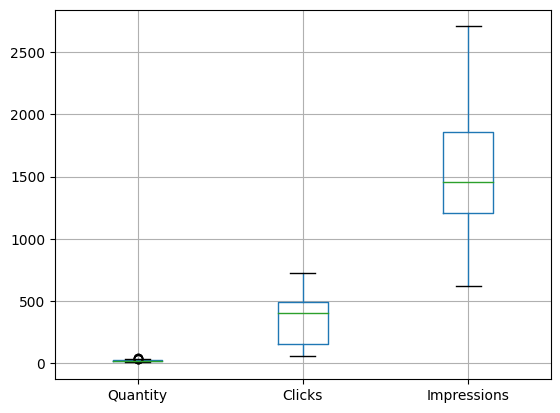

In [14]:
plt.figure()
df.boxplot()
plt.show()

In [15]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

print("Outliers in each dependent attribute:")
print(f"Quantity:\t {len(find_outliers_IQR(df['Quantity']))}")
print(f"Clicks:\t\t {len(find_outliers_IQR(df['Clicks']))}")
print(f"Impressions:\t {len(find_outliers_IQR(df['Impressions']))}")

Outliers in each dependent attribute:
Quantity:	 5
Clicks:		 0
Impressions:	 0


So, there are 5 outliers in the *Quantity* attribute

In [16]:
print(f"Quantity:\n{find_outliers_IQR(df['Quantity'])}")

Quantity:
4      33
9      38
78     38
113    32
142    36
Name: Quantity, dtype: int64


***

### Replacing Outliers with 97th percentile value

In [17]:
percentile_95_value = df["Quantity"].quantile(0.97)
print(percentile_95_value)

30.669999999999987


In [18]:
def impute_outliers_97th_percentile(series):
    q1, q3 = series.quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
    percentile_95_value = series.quantile(0.97)
    return series.apply(lambda x: percentile_95_value if x < lower_bound or x > upper_bound else x)

In [19]:
df['imputed_Quantity'] = impute_outliers_97th_percentile(df['Quantity'])

In [20]:
print("Outliers in each dependent attribute:")
print(f"Quantity:\t {len(find_outliers_IQR(df['imputed_Quantity']))}")

Outliers in each dependent attribute:
Quantity:	 0


Hence, the outliers are replaced by 97th percentile values.

# Feature Engineering

In [21]:
df.head()

,Day Index,Quantity,Clicks,Impressions,imputed_Quantity
0,2021-12-01,14,445,620,14.00
1,2021-12-02,10,433,890,10.00
2,2021-12-03,13,424,851,13.00
3,2021-12-04,22,427,881,22.00
4,2021-12-05,33,451,678,30.67


Imputed_Quantity signifies the quantity column where outliers are set on 97th percentile.

In [22]:
df['imputed_Quantity'] = impute_outliers_97th_percentile(df['Quantity'])

Log Tranformed attributes

In [23]:
df['log_Quantity'] = np.log1p(df['Quantity'])
df['log_Clicks'] = np.log1p(df['Clicks'])
df['log_Impressions'] = np.log1p(df['Impressions'])

Extract Month and Year

In [24]:
df['YearMonth'] = df['Day Index'].dt.to_period('M')

Extract Month Name

In [25]:
df['MonthName'] = df['YearMonth'].dt.strftime('%B')
month_order = ['December', 'January', 'February', 'March', 'April', 'May', 'June']  
df['MonthName'] = pd.Categorical(df['MonthName'], categories=month_order, ordered=True)

Extract day of the Week

In [26]:
df['DayOfWeek'] = df['Day Index'].dt.day_name()
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']  
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=week_order, ordered=True)

Reindexing the attributes for better understanding and clear view of the data


In [27]:
order = ["Day Index", "YearMonth", "MonthName", "DayOfWeek", "Quantity", "Clicks", "Impressions", "imputed_Quantity", "log_Quantity", "log_Clicks", "log_Impressions"]
df = df[order]

final data

In [28]:
df.head()

,Day Index,YearMonth,MonthName,DayOfWeek,Quantity,Clicks,Impressions,imputed_Quantity,log_Quantity,log_Clicks,log_Impressions
0,2021-12-01,2021-12,December,Wednesday,14,445,620,14.00,2.708050,6.100319,6.431331
1,2021-12-02,2021-12,December,Thursday,10,433,890,10.00,2.397895,6.073045,6.792344
2,2021-12-03,2021-12,December,Friday,13,424,851,13.00,2.639057,6.052089,6.747587
3,2021-12-04,2021-12,December,Saturday,22,427,881,22.00,3.135494,6.059123,6.782192
4,2021-12-05,2021-12,December,Sunday,33,451,678,30.67,3.526361,6.113682,6.520621


# exporting the final dataset for further analysis

In [30]:
df.to_excel('../final_df.xlsx', index=False)   